In [ ]:
import os

import scipy.io
!pip install torch torchvision transformers
import torchvision.transforms as transforms
import torch
from transformers import CLIPProcessor, CLIPModel
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from PIL import Image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!nvidia-smi

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
bird_dataset = '/content/drive/MyDrive/bird_dataset'

#if not os.path.exists(bird_dataset):
#    os.makedirs(bird_dataset)
#    print("Directory created successfully.")
# Extract the files from the tar.gz archive to the destination directory
#!tar -xvzf /content/drive/MyDrive/CUB_200_2011.tgz -C /content/drive/MyDrive/bird_dataset

In [ ]:

# Path to the directory containing the image categories
base_dir = "/content/drive/MyDrive/birddataset/CUB_200_2011/images"

# Get a list of subdirectories (categories) within the base directory
categories = os.listdir(base_dir)

# Loop through each category and count the number of images
for category in categories:
    category_path = os.path.join(base_dir, category)
    if os.path.isdir(category_path):
        image_count = len(os.listdir(category_path))
        print(f"Category: {category}, Images: {image_count}")

# Count the overall images in the image folder
overall_image_count = sum([len(files) for _, _, files in os.walk(base_dir)])
print(f"Total Overall Images: {overall_image_count}")


Category: Bobolink, Images: 60
Category: Cardinal, Images: 57
Category: Gadwall, Images: 60
Category: Mallard, Images: 60
Category: Sayornis, Images: 60
Category: Geococcyx, Images: 60
Category: Acadian Flycatcher, Images: 59
Category: American Crow, Images: 60
Category: American Goldfinch, Images: 60
Category: American Pipit, Images: 60
Category: American Redstart, Images: 60
Category: Anna Hummingbird, Images: 60
Category: Artic Tern, Images: 58
Category: Baird Sparrow, Images: 50
Category: Baltimore Oriole, Images: 60
Category: Bank Swallow, Images: 59
Category: Barn Swallow, Images: 60
Category: Belted Kingfisher, Images: 60
Category: Bewick Wren, Images: 60
Category: Black Tern, Images: 60
Category: Blue Grosbeak, Images: 60
Category: Blue Jay, Images: 60
Category: Bohemian Waxwing, Images: 60
Category: Brandt Cormorant, Images: 59
Category: Brewer Blackbird, Images: 59
Category: Brewer Sparrow, Images: 59
Category: Bronzed Cowbird, Images: 60
Category: Brown Creeper, Images: 59
C

In [ ]:

model_name_one = "openai/clip-vit-base-patch16"
clip_model_one = CLIPModel.from_pretrained(model_name_one)
processor_one = CLIPProcessor.from_pretrained(model_name_one)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/599M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
bird_class_to_label = {}
bird_dataset_path = '/content/drive/MyDrive/birddataset/CUB_200_2011/images'
bird_class_folders = os.listdir(bird_dataset_path)

for label, class_folder in enumerate(bird_class_folders):
    if os.path.isdir(os.path.join(bird_dataset_path, class_folder)):
        bird_class_to_label[class_folder] = label

bird_image_labels = []  # List to hold image filenames and their corresponding class labels

for class_folder in bird_class_folders:
    class_label = bird_class_to_label[class_folder]
    class_folder_path = os.path.join(bird_dataset_path, class_folder)
    image_files = os.listdir(class_folder_path)

    for image_filename in image_files:
        bird_image_labels.append((image_filename, class_folder))

print(bird_image_labels)

[('Bobolink_0044_9990.jpg', 'Bobolink'), ('Bobolink_0032_10217.jpg', 'Bobolink'), ('Bobolink_0131_9578.jpg', 'Bobolink'), ('Bobolink_0013_9367.jpg', 'Bobolink'), ('Bobolink_0065_9375.jpg', 'Bobolink'), ('Bobolink_0008_9289.jpg', 'Bobolink'), ('Bobolink_0117_10215.jpg', 'Bobolink'), ('Bobolink_0001_9261.jpg', 'Bobolink'), ('Bobolink_0064_10092.jpg', 'Bobolink'), ('Bobolink_0014_11055.jpg', 'Bobolink'), ('Bobolink_0092_10026.jpg', 'Bobolink'), ('Bobolink_0052_9423.jpg', 'Bobolink'), ('Bobolink_0050_9821.jpg', 'Bobolink'), ('Bobolink_0020_9194.jpg', 'Bobolink'), ('Bobolink_0047_9204.jpg', 'Bobolink'), ('Bobolink_0107_10252.jpg', 'Bobolink'), ('Bobolink_0099_9314.jpg', 'Bobolink'), ('Bobolink_0094_9823.jpg', 'Bobolink'), ('Bobolink_0059_10041.jpg', 'Bobolink'), ('Bobolink_0133_9618.jpg', 'Bobolink'), ('Bobolink_0019_10552.jpg', 'Bobolink'), ('Bobolink_0033_10809.jpg', 'Bobolink'), ('Bobolink_0053_10166.jpg', 'Bobolink'), ('Bobolink_0101_9811.jpg', 'Bobolink'), ('Bobolink_0069_9085.jpg', 'B

In [ ]:
import json
json_file_path = "/content/drive/MyDrive/bird_dataset/class_descriptions.json"

# Open and load the JSON file
with open(json_file_path, "r") as file:
    class_descriptions = json.load(file)

# Verify the data
print(class_descriptions)


In [ ]:

# Load the CLIP model and processor
device = "cuda" if torch.cuda.is_available() else "cpu"

text_features_list = []


# Loop through image labels to generate text prompts and descriptions
for image_filename, class_folder in bird_image_labels:
    # Get the class description from the dictionary
    class_description = class_descriptions[class_folder]
    text_prompt = class_description
    inputs = processor_one(text=text_prompt, return_tensors="pt", padding=True)
    inputs.to(device)

    # Get text features using the CLIP model
    with torch.no_grad():
        text_features = clip_model_one.get_text_features(**inputs.to(clip_model_one.device))
        text_features_list.append(text_features)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model_one.to(device)
bird_class_labels = []
bird_image_labels = []
bird_class_images = {}

for bird_class_folder in bird_class_folders:
    class_folder_path = os.path.join(bird_dataset_path, bird_class_folder)
    class_images = os.listdir(class_folder_path)
    bird_class_images[bird_class_folder] = class_images

image_features_list = []
for bird_class_folder, class_images in bird_class_images.items():
    for image_name in class_images:
        image_path = os.path.join(bird_dataset_path, bird_class_folder, image_name)
        bird_class_labels.append(bird_class_folder)
        bird_image_labels.append(image_path)
        image = Image.open(image_path).convert("RGB")
        image_input = processor_one(images=image, return_tensors="pt", padding=True).to(device)
        with torch.no_grad():
            image_features = clip_model_one.get_image_features(**image_input)
        image_features_list.append(image_features)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
image_features_tensor = torch.stack(image_features_list)
text_features_tensor = torch.stack(text_features_list)
image_features_tensor = image_features_tensor / image_features_tensor.norm(dim=-1, keepdim=True)
text_features_tensor = text_features_tensor / text_features_tensor.norm(dim=-1, keepdim=True)
image_features_tensor = image_features_tensor.cpu()
text_features_tensor = text_features_tensor.cpu()
image_features_flat = image_features_tensor.view(image_features_tensor.shape[0], -1)
text_features_flat = text_features_tensor.view(text_features_tensor.shape[0], -1)
similarity_matrix = cosine_similarity(image_features_flat, text_features_flat)
predicted_labels = [bird_class_labels[similarity.argmax()] for similarity in similarity_matrix]
correct_predictions = sum(1 for pred, actual in zip(predicted_labels, bird_class_labels) if pred == actual)
accuracy = correct_predictions / len(bird_class_labels) * 100
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 55.68%


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
predicted_labels_numeric = [bird_class_to_label[pred] for pred in predicted_labels]
actual_labels_numeric = [bird_class_to_label[actual] for actual in bird_class_labels]
precision = precision_score(actual_labels_numeric, predicted_labels_numeric, average='weighted')
recall = recall_score(actual_labels_numeric, predicted_labels_numeric, average='weighted')
f1 = f1_score(actual_labels_numeric, predicted_labels_numeric, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Precision: 0.63
Recall: 0.56
F1-score: 0.55


In [ ]:
from sklearn.metrics import classification_report
class_report = classification_report(actual_labels_numeric, predicted_labels_numeric)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.95      0.56        60
           1       0.96      0.96      0.96        57
           2       0.92      0.98      0.95        60
           3       0.95      0.97      0.96        60
           4       0.26      0.08      0.13        60
           5       0.81      0.97      0.88        60
           6       0.25      0.34      0.29        59
           7       0.44      0.12      0.18        60
           8       0.89      0.70      0.79        60
           9       0.73      0.85      0.78        60
          10       0.83      0.75      0.79        60
          11       0.51      0.82      0.63        60
          12       0.80      0.14      0.24        58
          13       0.09      0.12      0.11        50
          14       0.51      0.80      0.62        60
          15       0.41      0.81      0.54        59
          16       0.72      0.83      0.78        60
    

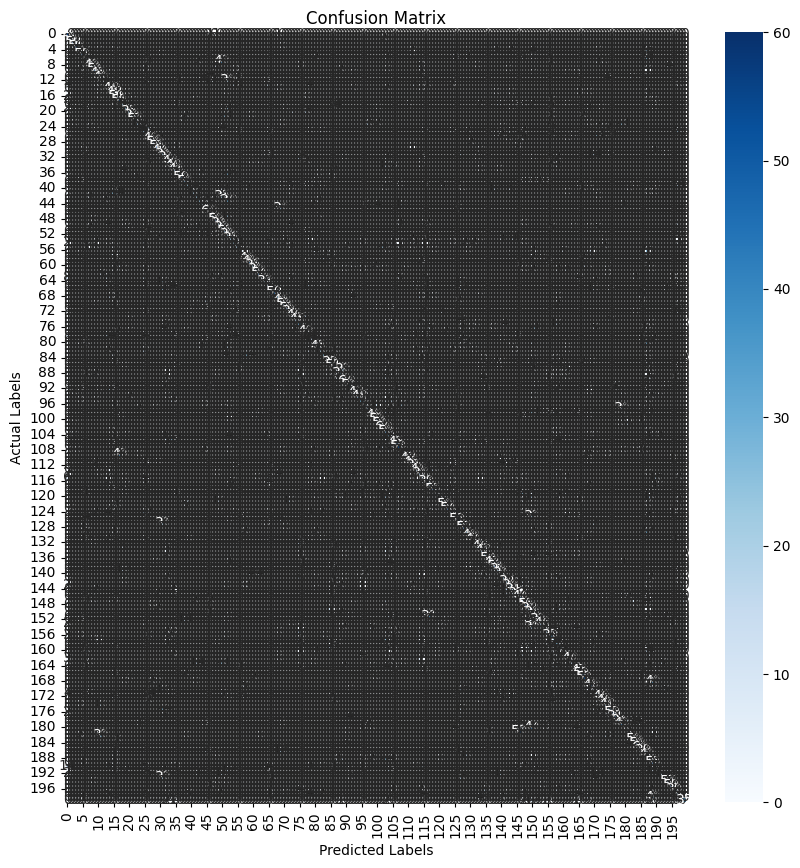

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)

# Set axis labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")

plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(actual_labels_numeric, predicted_labels_numeric)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[57  0  0 ...  0  0  0]
 [ 0 55  0 ...  0  0  0]
 [ 0  0 59 ...  0  0  0]
 ...
 [ 0  0  0 ... 20  0  0]
 [ 0  0  0 ...  0  2  0]
 [ 0  0  0 ...  0  0 35]]


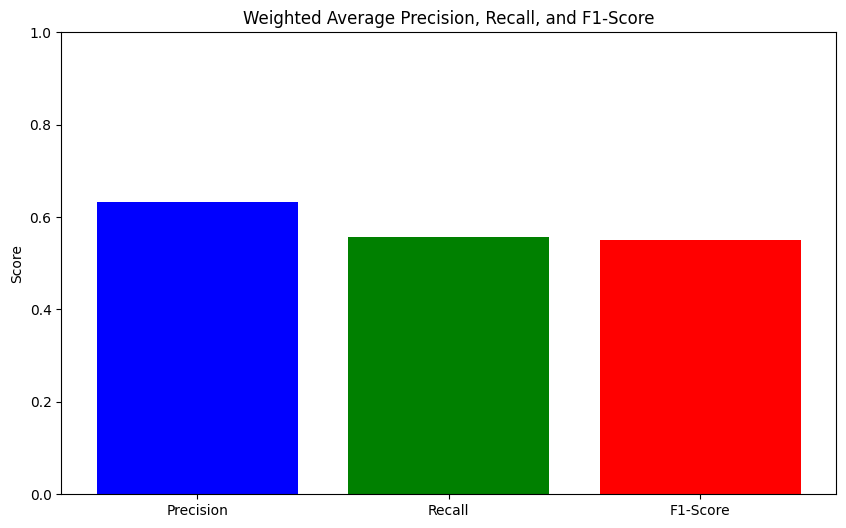

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics._classification import _check_targets

# Compute the classification report
class_report = classification_report(actual_labels_numeric, predicted_labels_numeric, output_dict=True)

# Extract precision, recall, and f1-score for each class
precision_dict = class_report['weighted avg']
recall_dict = class_report['weighted avg']
f1_dict = class_report['weighted avg']

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
metrics = ['Precision', 'Recall', 'F1-Score']
values = [precision_dict['precision'], recall_dict['recall'], f1_dict['f1-score']]

plt.bar(metrics, values, color=['blue', 'green', 'red'])
plt.ylabel('Score')
plt.title('Weighted Average Precision, Recall, and F1-Score')
plt.ylim(0, 1)  # Set the y-axis limit to [0, 1] for precision, recall, and F1-score
plt.show()
